# 📊 Analyse exploratoire des données

Objectif : Analyse et évaluation des données qui seront utilisées dans le développement d'un modèle d'apprentissage automatique de régression linéaire pour prédire le temps de résolution des tickets d'incident.

Cette analyse nous permettra de : :
- Comprendre la structure du jeu de données
- Identifier les types de variables (numériques, catégorielles, temporelles, etc.)
- Détecter les valeurs manquantes, aberrantes ou incohérentes
- Analyser les distributions des variables clés
- Formuler des hypothèses utiles pour la modélisation future
- Mettre en évidence des pistes de création de variables (feature engineering)

À travers des visualisations claires et des statistiques descriptives, nous allons documenter les éléments importants à considérer lors du prétraitement des données dans l'étape suivante.


In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set_theme(style="whitegrid")
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 8

color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']


#### Chargement et exploration initiale des données

1. Chargement du fichier CSV contenant les données des tickets d'incident
2. Affichage des premières lignes du dataframe pour visualiser sa structure
3. Vérification des dimensions du dataset (nombre de lignes et colonnes)
4. Consultation des informations détaillées sur le dataframe (types de données, valeurs non-nulles)



In [140]:
df = pd.read_csv('../data/raw/trouble_tickets.csv')
df.head()

,ticketId,category,creationDate,device,issueType,priority,numberAffectedUsers,reportedBy,severity,status,resolutionDate,customer
0,T4347360,Wireless Network,2025-01-01 00:10:00,Gateway-CHI-V6500-WH892,[ROOT] Configuration Error on Network,Critical,NaN,Joseph Lee,Unknown,Closed,2025-01-01 09:00:00,9905095026
1,T4347363,Wireless Network,2025-01-01 00:20:00,Modem-NYC-S8500-YE944,Authentication Failure on Backup Link,Critical,NaN,Joseph Lee,Unknown,Closed,2025-01-01 05:52:28,9905095026
2,T4347366,Wireless Network,2025-01-01 00:25:00,Gateway-CHI-V6500-WH892,Routing Loop on Firewall,Critical,NaN,Joseph Lee,Unknown,Closed,2025-01-01 09:00:00,9905095026
3,T4347375,Wireless Network,2025-01-01 00:40:00,Gateway-CHI-V6500-WH892,Hardware Failure on Router,Critical,NaN,Joseph Lee,Unknown,Closed,2025-01-01 09:00:00,9905095026
4,T4347376,Wireless Network,2025-01-01 00:40:00,Hub-SEA-M3000-SJ762,Connection Down on Circuit,Critical,NaN,Joseph Lee,Unknown,Closed,2025-01-01 09:00:00,9902641725


In [141]:
print("Dataset shape:", df.shape)

Dataset shape: (5930, 12)


In [142]:
print("\nData information:")
df.info()


Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5930 entries, 0 to 5929
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ticketId             5930 non-null   object
 1   category             5930 non-null   object
 2   creationDate         5930 non-null   object
 3   device               5930 non-null   object
 4   issueType            5930 non-null   object
 5   priority             5930 non-null   object
 6   numberAffectedUsers  140 non-null    object
 7   reportedBy           5909 non-null   object
 8   severity             5930 non-null   object
 9   status               5930 non-null   object
 10  resolutionDate       4737 non-null   object
 11  customer             5930 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 556.1+ KB


#### Prétraitement des données temporelles

Dans cette section, nous effectuons les opérations suivantes :

1. Conversion des colonnes de dates (<code>creationDate</code> et <code>resolutionDate</code>) en format datetime.

2. Calcul du temps de résolution en heures, représentant la durée écoulée entre la date de
   création et la date de résolution de chaque ticket. Cette valeur est stockée dans une
   nouvelle colonne appelée <code>resolution_time</code>.



In [143]:
# Convert timestamp columns to datetime
df['creationDate'] = pd.to_datetime(df['creationDate'], errors='coerce')
df['resolutionDate'] = pd.to_datetime(df['resolutionDate'],errors='coerce')

# Calculate resolution time in hours
df['resolution_time'] = (df['resolutionDate'] - df['creationDate']).dt.total_seconds() / 3600

In [144]:
df.head()

,ticketId,category,creationDate,device,issueType,priority,numberAffectedUsers,reportedBy,severity,status,resolutionDate,customer,resolution_time
0,T4347360,Wireless Network,2025-01-01 00:10:00,Gateway-CHI-V6500-WH892,[ROOT] Configuration Error on Network,Critical,NaN,Joseph Lee,Unknown,Closed,2025-01-01 09:00:00,9905095026,8.833333
1,T4347363,Wireless Network,2025-01-01 00:20:00,Modem-NYC-S8500-YE944,Authentication Failure on Backup Link,Critical,NaN,Joseph Lee,Unknown,Closed,2025-01-01 05:52:28,9905095026,5.541111
2,T4347366,Wireless Network,2025-01-01 00:25:00,Gateway-CHI-V6500-WH892,Routing Loop on Firewall,Critical,NaN,Joseph Lee,Unknown,Closed,2025-01-01 09:00:00,9905095026,8.583333
3,T4347375,Wireless Network,2025-01-01 00:40:00,Gateway-CHI-V6500-WH892,Hardware Failure on Router,Critical,NaN,Joseph Lee,Unknown,Closed,2025-01-01 09:00:00,9905095026,8.333333
4,T4347376,Wireless Network,2025-01-01 00:40:00,Hub-SEA-M3000-SJ762,Connection Down on Circuit,Critical,NaN,Joseph Lee,Unknown,Closed,2025-01-01 09:00:00,9902641725,8.333333


#### Analyse statistique et détection des valeurs manquantes

1. Identification et comptage des valeurs manquantes dans chaque colonne
2. Génération de statistiques descriptives pour les variables numériques
3. Analyse des variables catégorielles (object)


In [145]:
df.isnull().sum()

ticketId                  0
category                  0
creationDate            147
device                    0
issueType                 0
priority                  0
numberAffectedUsers    5790
reportedBy               21
severity                  0
status                    0
resolutionDate         1193
customer                  0
resolution_time        1193
dtype: int64

In [146]:
df.describe()

,creationDate,resolutionDate,customer,resolution_time
count,5783,4737,5.930000e+03,4737.000000
mean,2025-02-14 00:58:53.836762880,2025-02-15 09:45:32.478573056,9.905188e+09,31.015084
min,2025-01-01 00:10:00,2025-01-01 05:36:58,9.900000e+09,1.903889
25%,2025-01-17 13:30:00,2025-01-18 13:27:50,9.902642e+09,21.988333
50%,2025-02-15 15:48:55,2025-02-17 09:00:00,9.905034e+09,31.083333
75%,2025-03-15 11:55:00,2025-03-17 09:00:00,9.907340e+09,39.073333
max,2025-04-07 10:11:22,2025-04-08 12:00:00,9.957849e+09,187.533056
std,NaN,NaN,5.270488e+06,16.954798


In [147]:
df.describe(include='O')

,ticketId,category,device,issueType,priority,numberAffectedUsers,reportedBy,severity,status
count,5930,5930,5930,5930,5930,140,5909,5930,5930
unique,5930,10,2799,433,5,7,66,5,1
top,T4409951,Wireless Network,Gateway-NYC-Z2500-UR949,Service Degradation on Interface,Medium,5-14,Joseph Lee,Unknown,Closed
freq,1,2362,170,682,4579,37,5315,5745,5930


#### Visualisation du temps de résolution par facteurs clés

1. **Histogramme de distribution** : Visualisation de la répartition globale des temps de résolution avec indication
   de la moyenne et médiane, permettant d'identifier les tendances centrales et la dispersion.

2. **Analyse par catégorie** : Représentation du nombre d'incidents par catégorie à l'aide d'un diagramme à barres,
   mettant en évidence les domaines les plus fréquemment touchés.

3. **Analyse par priorité** : Visualisation de la proportion du temps moyen de résolution selon le niveau de priorité
   à l'aide d'un graphique en (donut chart), permettant d'identifier rapidement l'impact de la priorité sur les délais de résolution.

Ces visualisations nous aident à comprendre comment différents facteurs influencent les temps de résolution.


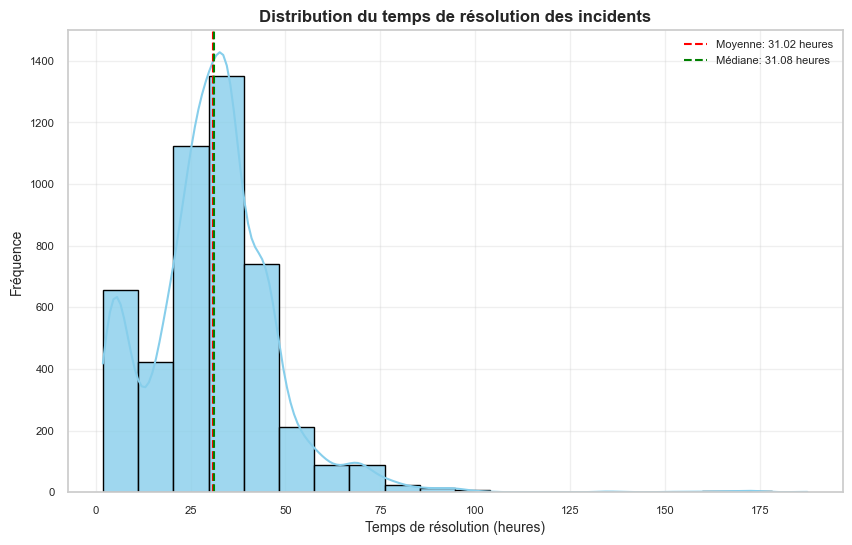

In [148]:
# Resolution time distribution
df_rt = df['resolution_time']
rt_mean = df_rt.mean()
rt_median = df_rt.median()

plt.figure(figsize=(10, 6))
sns.histplot(df_rt, bins=20, kde=True, color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Distribution du temps de résolution des incidents')
plt.xlabel('Temps de résolution (heures)')
plt.ylabel('Fréquence')
plt.axvline(rt_mean, color='red', linestyle='--', label=f'Moyenne: {rt_mean:.2f} heures')
plt.axvline(rt_median, color='green', linestyle='--', label=f'Médiane: {rt_median:.2f} heures')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

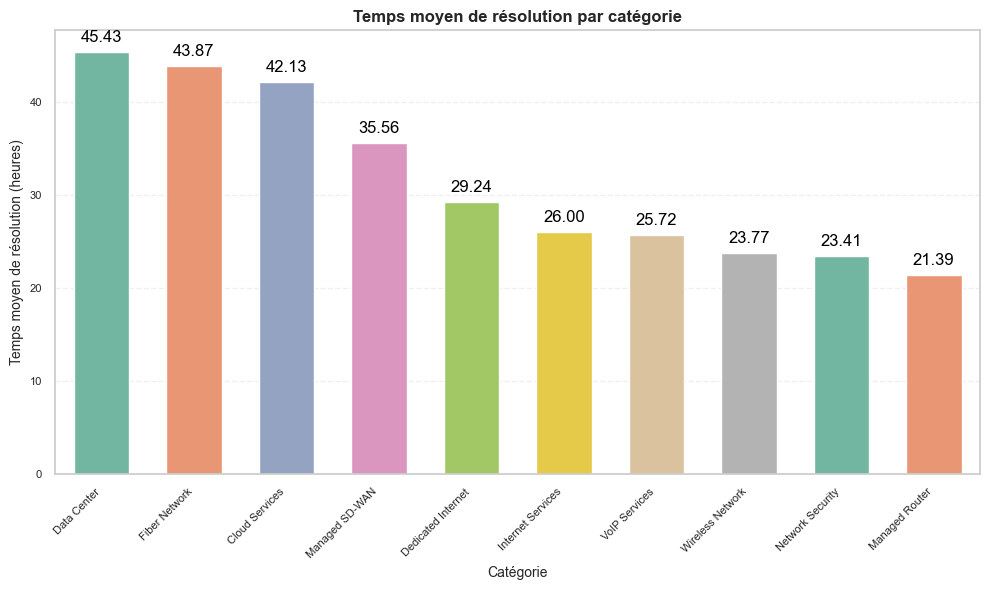

In [149]:
category_resolution = df.groupby('category')['resolution_time'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=category_resolution,
    x='category',
    y='resolution_time',
    hue='category',
    palette='Set2',
    legend=False,
    width=0.6
)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=12, color='black', xytext=(0, 5),
        textcoords='offset points'
    )

plt.title('Temps moyen de résolution par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Temps moyen de résolution (heures)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

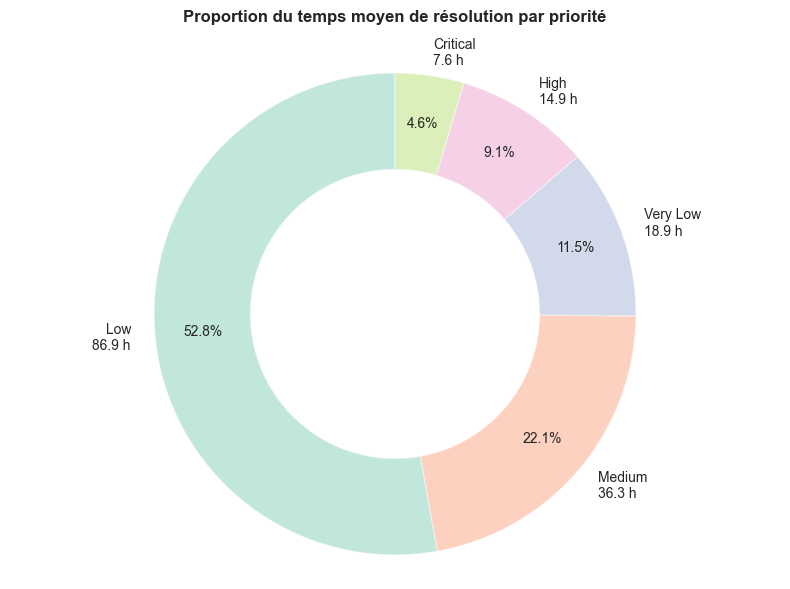

In [150]:
priority_mean_res = (
    df.groupby("priority")["resolution_time"]
    .mean()
    .sort_values(ascending=False)
)

fig, ax = plt.subplots(figsize=(8, 6))

base_colors = sns.color_palette("Set2", n_colors=len(priority_mean_res))
colors_rgba = [(r, g, b, 0.6) for r, g, b in base_colors]

wedges, texts, autotexts = ax.pie(
    priority_mean_res,
    labels=[f"{p}\n{t:.1f} h" for p, t in priority_mean_res.items()],
    autopct="%1.1f%%",
    colors=colors_rgba,
    startangle=90,
    pctdistance=0.8,
    textprops={"fontsize": 10},
    wedgeprops={"width": 0.4, "edgecolor": "#FFFFFF"},
    shadow=False
)

for w in wedges:
    w.set_alpha(0.4)

ax.set_title("Proportion du temps moyen de résolution par priorité", pad=20)
ax.axis("equal")
plt.tight_layout()
plt.show()

#### Ingénierie des caractéristiques et analyse des corrélations

1. **Création de prédicteurs temporels** :
   - Extraction du jour de la semaine à partir de la date de création
   - Extraction du mois de création
   - Création d'un indicateur binaire pour les week-ends (1 si samedi ou dimanche, 0 sinon)

   Ces variables temporelles permettent de capturer les effets cycliques et saisonniers potentiellement
   liés au temps de résolution des incidents.

2. **Encodage des variables catégorielles** :
   - Utilisation de LabelEncoder pour transformer les colonnes catégorielles <code>(issueType, category,priority, severity)</code> en valeurs numériques
   - Cette approche a été privilégiée par rapport au OneHotEncoding car les variables catégorielles présentent de nombreuses modalités, ce qui aurait généré une matrice très augmenté.


3. **Analyse des corrélations** :
   - Calcul et visualisation de la matrice de corrélation entre la variable cible (temps de résolution) et les prédicteurs potentiels
   - Cette analyse permet d'identifier les facteurs ayant le plus d'influence sur le temps de résolution
     et d'orienter la sélection de variables pour la modélisation prédictive


In [151]:
df['creation_day_of_week'] = df['creationDate'].dt.dayofweek
df['creation_month'] = df['creationDate'].dt.month
df['is_weekend'] = df['creation_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [152]:
categorical_cols = ['issueType', 'category', 'priority', 'severity']

le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,ticketId,category,creationDate,device,issueType,priority,numberAffectedUsers,reportedBy,severity,status,resolutionDate,customer,resolution_time,creation_day_of_week,creation_month,is_weekend
0,T4347360,9,2025-01-01 00:10:00,Gateway-CHI-V6500-WH892,292,0,NaN,Joseph Lee,4,Closed,2025-01-01 09:00:00,9905095026,8.833333,2.0,1.0,0
1,T4347363,9,2025-01-01 00:20:00,Modem-NYC-S8500-YE944,0,0,NaN,Joseph Lee,4,Closed,2025-01-01 05:52:28,9905095026,5.541111,2.0,1.0,0
2,T4347366,9,2025-01-01 00:25:00,Gateway-CHI-V6500-WH892,82,0,NaN,Joseph Lee,4,Closed,2025-01-01 09:00:00,9905095026,8.583333,2.0,1.0,0
3,T4347375,9,2025-01-01 00:40:00,Gateway-CHI-V6500-WH892,46,0,NaN,Joseph Lee,4,Closed,2025-01-01 09:00:00,9905095026,8.333333,2.0,1.0,0
4,T4347376,9,2025-01-01 00:40:00,Hub-SEA-M3000-SJ762,31,0,NaN,Joseph Lee,4,Closed,2025-01-01 09:00:00,9902641725,8.333333,2.0,1.0,0


In [153]:
correlation_matrix = df[['resolution_time', 'category','severity', 'issueType', 'priority', 'creation_day_of_week', 'creation_month', 'is_weekend']].corr()
display(correlation_matrix)

,resolution_time,category,severity,issueType,priority,creation_day_of_week,creation_month,is_weekend
resolution_time,1.000000,-0.350601,0.019272,0.129520,0.631226,0.124432,0.290101,0.122649
category,-0.350601,1.000000,0.056616,0.015143,-0.303676,-0.103213,-0.321658,-0.148715
severity,0.019272,0.056616,1.000000,-0.038707,0.006652,0.033726,0.004639,0.104684
issueType,0.129520,0.015143,-0.038707,1.000000,0.102010,-0.015895,0.061937,-0.015930
priority,0.631226,-0.303676,0.006652,0.102010,1.000000,0.162470,0.363062,0.145228
creation_day_of_week,0.124432,-0.103213,0.033726,-0.015895,0.162470,1.000000,0.177605,0.798310
creation_month,0.290101,-0.321658,0.004639,0.061937,0.363062,0.177605,1.000000,0.252034
is_weekend,0.122649,-0.148715,0.104684,-0.015930,0.145228,0.798310,0.252034,1.000000


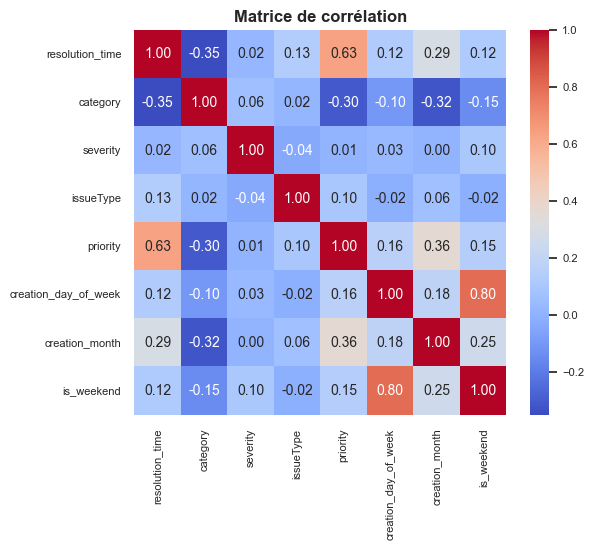

In [154]:
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

## 🧩 Conclusions de l'analyse exploratoire

- Plusieurs colonnes contiennent des valeurs manquantes significatives (notamment `numberAffectedUsers`, `resolutionDate`)
- Le champ `resolution_time` peut être construit à partir des dates et servira de **variable cible**
- Des colonnes comme `priority`, `category`, `issueType`, `creation_day_of_week`, `creation_month`, `is_weekend` influencent le temps de résolution
- Des variables dérivées temporelles (mois, jour de la semaine, week-end) seront utiles dans l'étape de prétraitement


